Se implementan las mejoras descritas en el post <a href="http://pyciencia.blogspot.com/2015/03/mejoras-visuales-en-matplotlib.html">Mejoras visuales matplotlib</a> sobre gráficas usadas comúnmente como histogramas, gráficos de dispersión y diagramas circulares, además de mejoras específicas sobre cada una de estas.

<b> Creado: Abril 30 de 2015 <br>
Modificado: Junio 6 de 2019 <br>
Testeado en:
    - Python 3.6.4
    - matplotlib 2.1.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Histograma

Se grafica con el estilo por defecto de matplotlib:

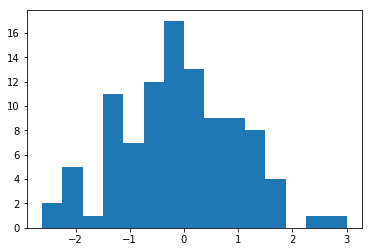

In [2]:
# Se generan datos aleatorios
x = [np.random.normal(0, 1) for i in range(100)]

plt.hist(x, 15)
plt.show()

Ahora se muestra un estilo modificado para lograr una gráfica mas limpia y profesional. Note que el uso de *zorder* evita que cualquier otro componente de la gráfica, como la malla (*grid*) quede sobre el histograma:

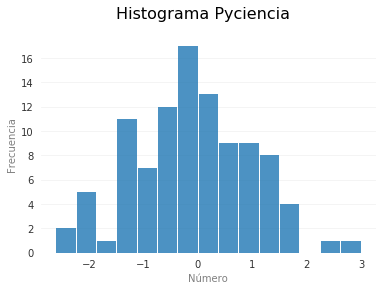

In [3]:
ax = plt.gca()

# Desactiva los ejes en la gráfica
for edge, spine in ax.spines.items():
    spine.set_visible(False)

# Muestra solo la parte horizontal de la malla (axis='y')
ax.grid(axis='y', linestyle='-', color='#f2f2f2')

# Modifica el color de los nombres de los ejes
ax.yaxis.label.set_color('#808080')
ax.xaxis.label.set_color('#808080')

# Modifica el color de los ticks de los ejes
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')

# Elimina la señalización de los ticks sobre los ejes
plt.tick_params(width=0)

# rwidth=0.96 genera un espacio de 0.04 entre las barras del histograma
# Se eliminan bordes en las barras al agregar el argumento linewidth=0 y 
# zorder=2 pone el histograma sobre los otros componentes de la gráfica
plt.hist(x, 15, linewidth=0, rwidth=0.96, alpha=0.8, zorder=2)
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.suptitle('Histograma Pyciencia', fontsize=16)
plt.show()

## Gráfica de dispersión

Se grafica un *scatter* con el estilo por defecto de matplotlib

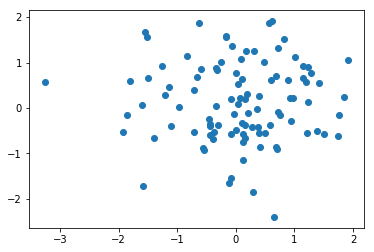

In [4]:
# Se generan datos aleatorios
x = [np.random.normal(0, 1) for i in range(100)]
y = [np.random.normal(0, 1) for i in range(100)]

plt.scatter(x, y)
plt.show()

La implementación de las mejoras es equivalente a la del histograma, mostrada antes, se deja la malla en dirección *x* y *y* para facilitar lectura y se hacen modificación de radio de punto, modificación propia del diagrama de dispersión:

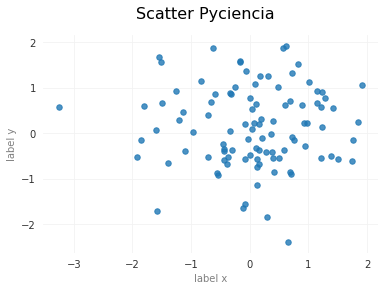

In [5]:
ax = plt.gca()

# Desactiva los ejes en la gráfica
for edge, spine in ax.spines.items():
    spine.set_visible(False)

# Generación del grid
ax.grid(linestyle='-', color='#f2f2f2')

# Modifica el color de los nombres de los ejes
ax.yaxis.label.set_color('#808080')
ax.xaxis.label.set_color('#808080')

# Modifica el color de los ticks de los ejes
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis='y', colors='#333333')

# Elimina la señalización de los ticks sobre los ejes
plt.tick_params(width=0)

# El argumento s modifica el diámetro de los puntos
plt.scatter(x, y, s=30, alpha=0.8, zorder=2)
plt.xlabel('label x')
plt.ylabel('label y')
plt.suptitle('Scatter Pyciencia', fontsize=16)
plt.show()

## Diagrama circular

Se grafica un diagrama circular con el estilo por defecto de *matplotlib*:

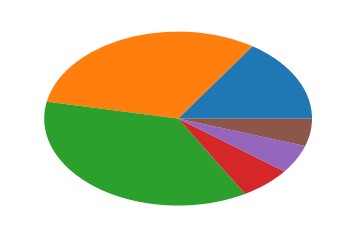

In [6]:
datos = [15, 30, 35, 6, 5.08, 4.9]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
plt.pie(datos)
plt.show()

Ahora se implementan modificaciones de color, labels y remoción de elementos innecesarios para hacer mas claro el diagrama:

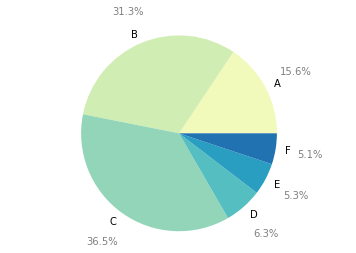

In [7]:
# Datos para graficar
datos = np.array([15, 30, 35, 6, 5.08, 4.9])
labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Se agregan colores con plt.cm estableciendo un color para cada espacio en el 
# diagrama, por eso se usa un linspace de la misma magnitud de los datos.
colors = plt.cm.YlGnBu(np.linspace(0.1, 0.7, len(datos)))

# Generación del diagrama circular
# En autopct='%.1f%%' el 1 dice el número de cifras significativas en el label
# ptcdistance especifica la distancia del porcentaje tomada desde el centro
kwargs = dict(labels=labels, autopct='%.1f%%', pctdistance=1.35, colors=colors)
patches, texts, autotexts = plt.pie(datos, **kwargs)

# 'equal' hace que la gráfica se vea como una círculo
plt.axis('equal')

# Se eliminan los bordes de la gráfica
plt.rcParams['patch.linewidth'] = 0

for text in autotexts:
    text.set_color('gray')

plt.show()

Se puede usar una legenda en caso de que se requieran mostrar demasiados datos sobre el diagrama:

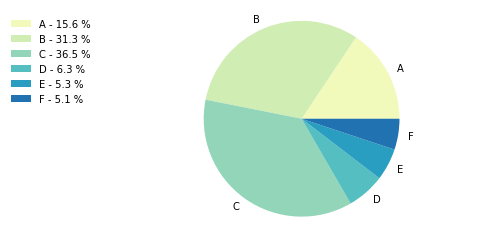

In [8]:
# Datos para graficar
datos = np.array([15, 30, 35, 6, 5.08, 4.9])
labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Se agregan colores con plt.cm estableciendo un color para cada espacio en el 
# diagrama, por eso se usa un linspace de la misma magnitud de los datos.
colors = plt.cm.YlGnBu(np.linspace(0.1, 0.7, len(datos)))

# Generación del diagrama circular
patches, texts = plt.pie(datos, labels=labels, colors=colors)

# Para que siempre se vea como un círculo
plt.axis('equal')

# Se eliminan las líneas
plt.rcParams['patch.linewidth'] = 0

# Estimación porcentaje
porcent = 100*datos / sum(datos)
# Lista que será expuesta en la legenda
labels = ['{0} - {1:1.1f} %'.format(i,j) for i, j in zip(labels, porcent)]

# Se genera la legenda
# bbox_to_anchor especifica en coordenadas la posición de la legenda
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.), fontsize=10)

plt.show()